Date: Feb. 5, 2017
By: Ford Fowler

## About the Data:

Describes housing values in the suburbs of Boston
### Column Descriptions:
* CRIM: per capita crime rate by town 
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
* INDUS: proportion of non-retail business acres per town 
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
* NOX: nitric oxides concentration (parts per 10 million) 
* RM: average number of rooms per dwelling 
* AGE: proportion of owner-occupied units built prior to 1940 
* DIS: weighted distances to five Boston employment centres 
* RAD: index of accessibility to radial highways 
* TAX: full-value property-tax rate per 10,000 
* PTRATIO: pupil-teacher ratio by town 
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
* LSTAT: % lower status of the population 
* MEDV: Median value of owner-occupied homes in $1000's

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ImportError: No module named pandas

In [3]:
df = pd.read_csv('boston_housing_data.csv', sep=',', header=None)
df = df.rename(columns={0:'NaN_col'}).drop('NaN_col', axis=1)
df = df.rename(columns={
    1:'CRIM', 
    2:'ZN', 
    3:'INDUS', 
    4:'CHAS', 
    5:'NOX',
    6:'RM', 
    7:'AGE',
    8:'DIS',
    9:'RAD',
    10:'TAX',
    11:'PTRATIO',
    12:'B',
    13:'LSTAT',
    14:'MEDV'
})
df = df.dropna()
df

NameError: name 'pd' is not defined

In [3]:
np.median(df['MEDV'].dropna()) * 1000

21950.0

In [4]:
np.mean(df['MEDV'].dropna()) * 1000

23750.442477876106

Median home values across all Boston Suburbs: $21,950.00

Average home values across all Boston Suburbs: $23,750.44

In [5]:
df[df.AGE == min(df['AGE'])]['MEDV'] * 1000

41    26600.0
Name: MEDV, dtype: float64

Median home value of suburb with newest houses: $26,600.00

In [6]:
df_river = df[df.CHAS == 1]
df_noriver = df[df.CHAS == 0]
x_river = df_river['PTRATIO']
x_noriver = df_noriver['PTRATIO']
y_river = df_river['CRIM']
y_noriver = df_noriver['CRIM']

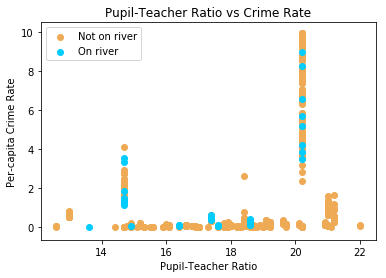

In [7]:
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Per-capita Crime Rate')
x = plt.scatter(x_noriver, y_noriver, color='#EEAA55')
y = plt.scatter(x_river, y_river, color='#00CCFF')
plt.legend(handles=[x, y], labels=['Not on river', 'On river'])
plt.title('Pupil-Teacher Ratio vs Crime Rate')
plt.show()

There seems to be a correlation between higher ratios of pupils to teachers and crime. Fewer teachers, more crime. Whether the area borders the Charles River seems to have no effect.

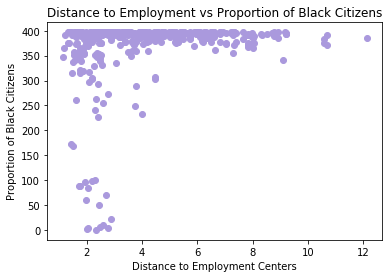

In [8]:
plt.xlabel('Distance to Employment Centers')
plt.ylabel('Proportion of Black Citizens')
plt.title('Distance to Employment vs Proportion of Black Citizens')
y = plt.scatter(df['DIS'], df['B'], color='#AA99DD')
plt.show()

In this scatterplot, it's clear there exists a correlation between the proportion of black citizens in an area and that area's distance to Boston's employment centers. The closer you get to employment centers, the smaller the proportion of black citizens living there, and vice versa.

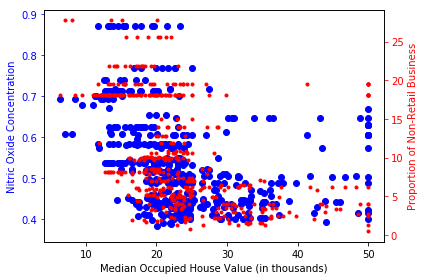

In [9]:
fig, ax1 = plt.subplots()
t = df['MEDV']
s1 = df['NOX']

ax1.scatter(t, s1, c='b')
ax1.set_xlabel('Median Occupied House Value (in thousands)')
ax1.set_ylabel('Nitric Oxide Concentration', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = df['INDUS']
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('Proportion of Non-Retail Business', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

From this beautiful mess of a scatterplot, one could argue that both nitric oxide concetrations and proportion of non-retail business correlate similarly with the median house values of the suburbs of Boston. Higher NOX concentrations and higher proportions of non-retail business both correlate to lower median occupied housing values.